Dataset shape: (5110, 12)

First few rows:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

Data types a

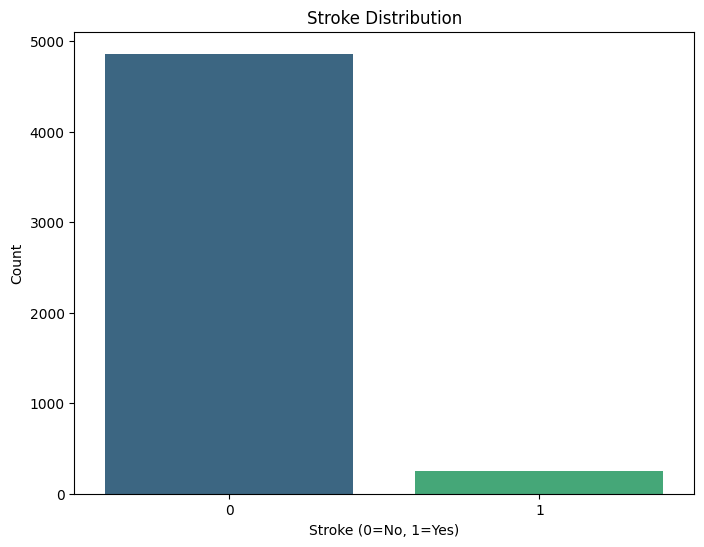


Missing values per column:
bmi    201
dtype: int64


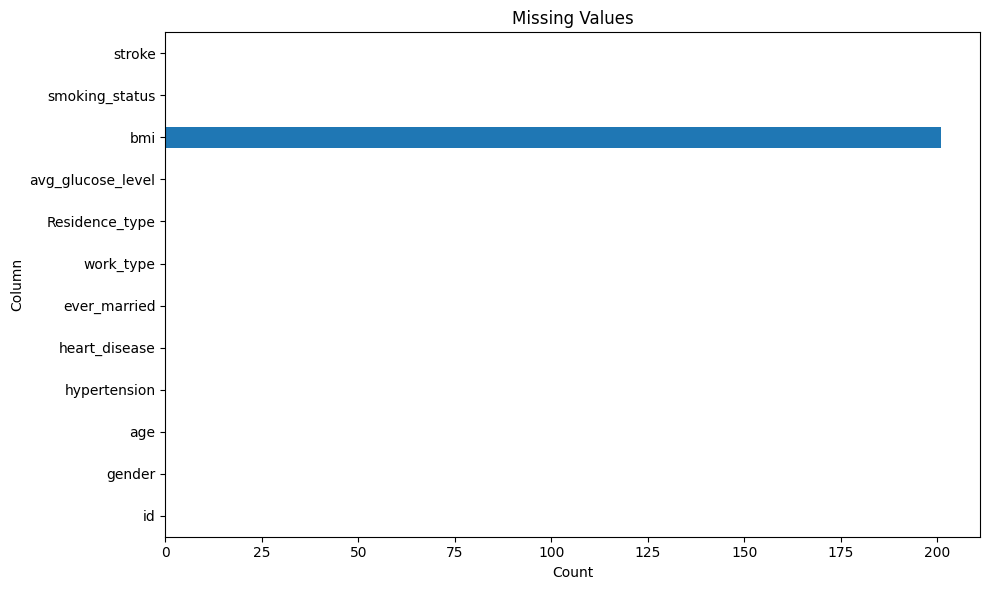

People who got stroke and their BMI is NA: 40
Overall people who got stroke: 249
Percentage of people with stroke in NaN values: 16.06%
NULL values hold 3.93% of the instances in the dataframe


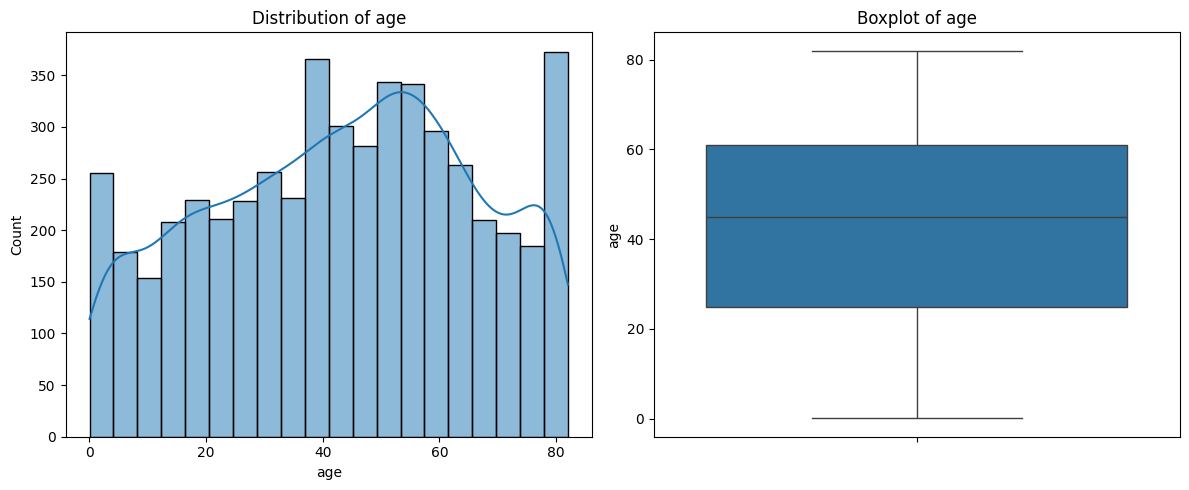

Total outliers in age: 0
Total non-outliers in age: 5110


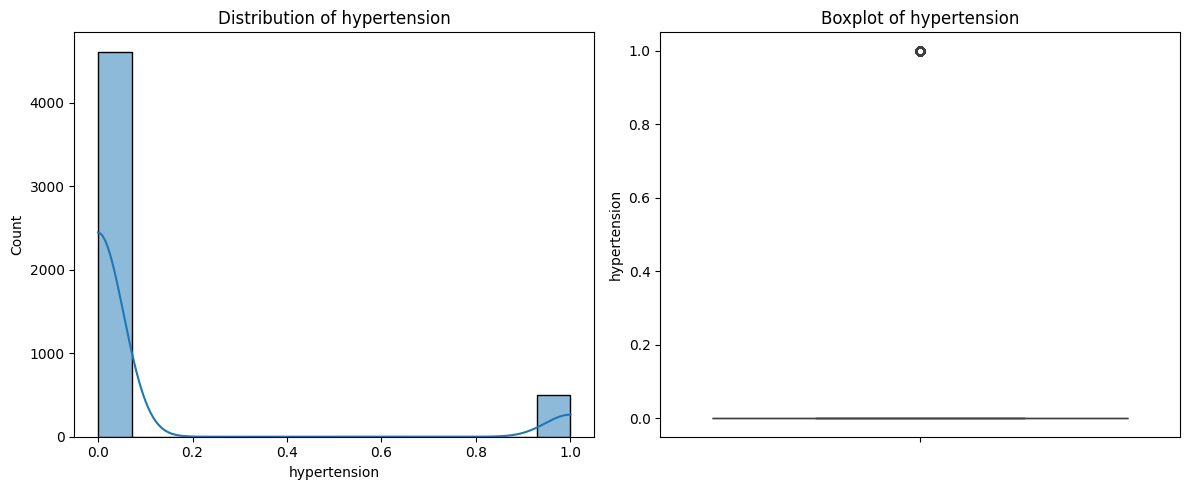

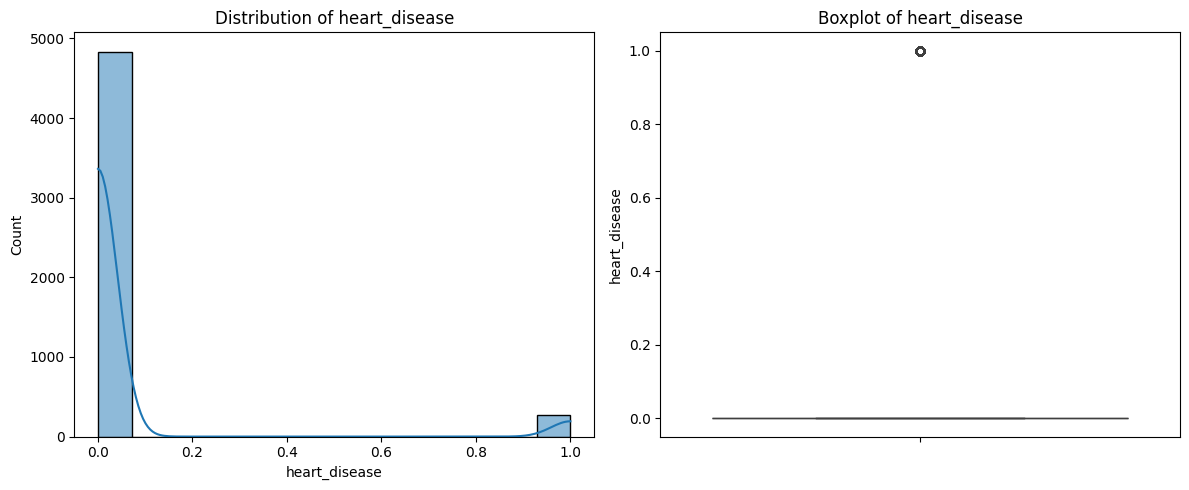

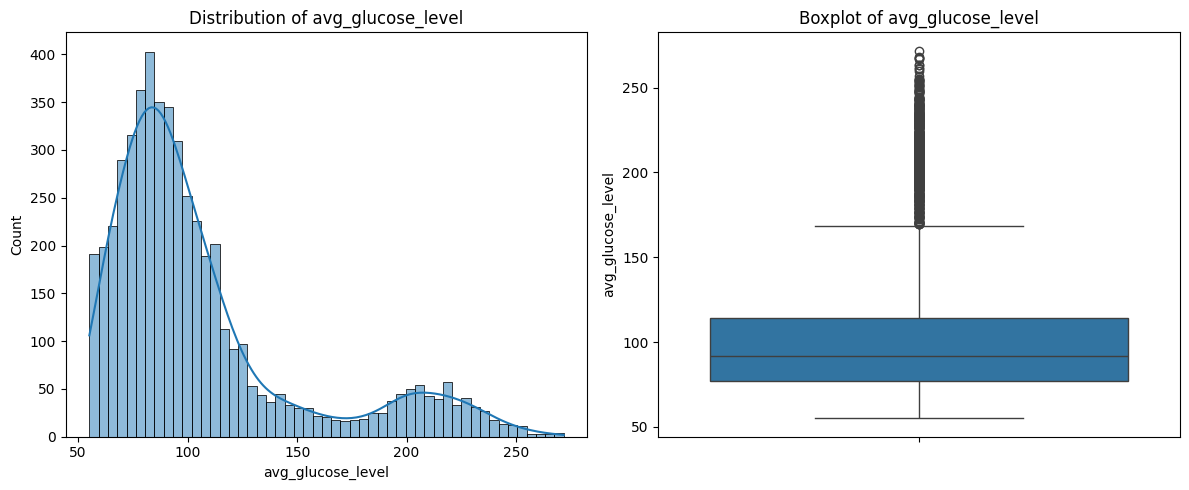

Total outliers in avg_glucose_level: 627
Total non-outliers in avg_glucose_level: 4483


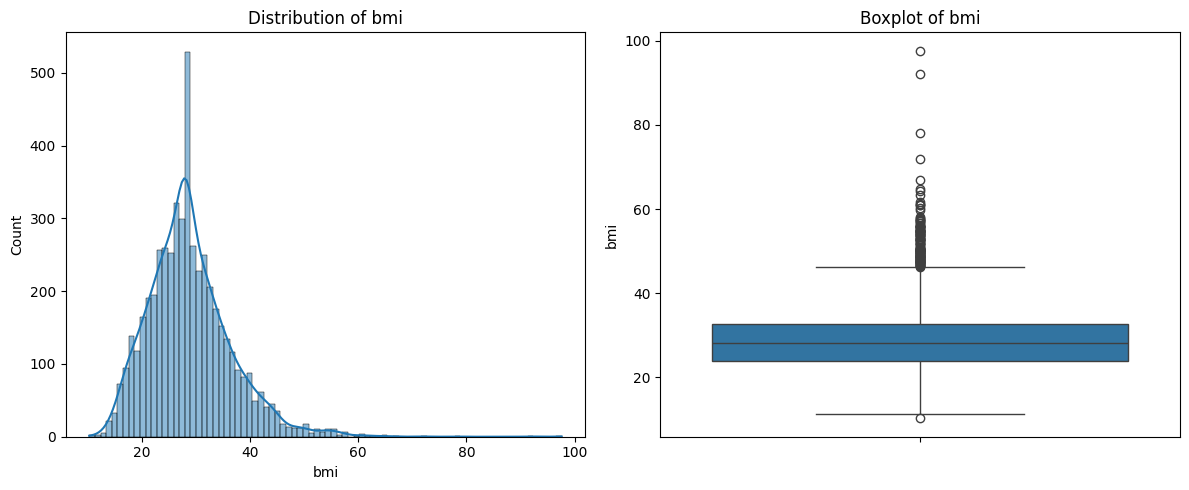

Total outliers in bmi: 126
Total non-outliers in bmi: 4984


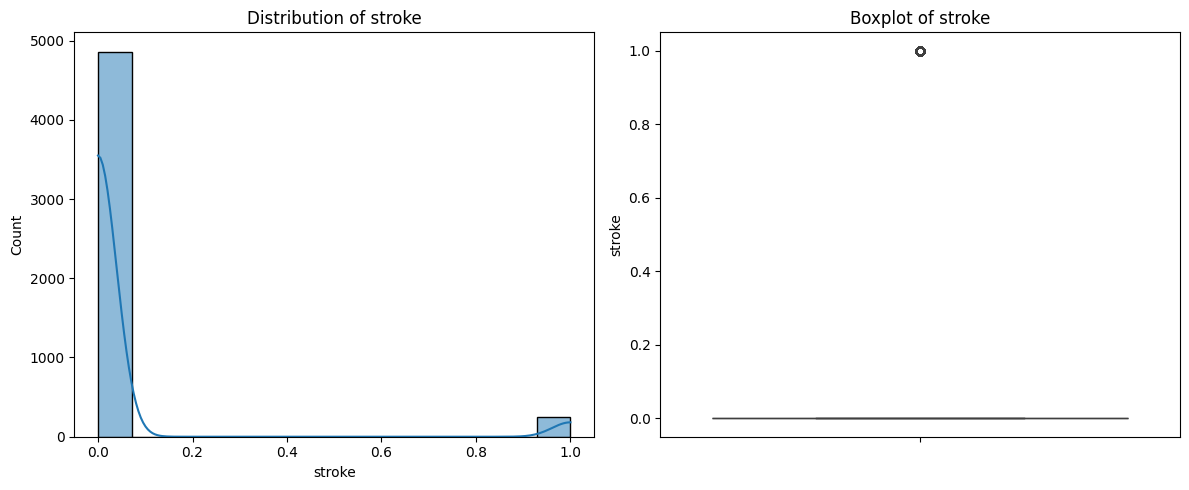


gender value counts:
gender
Female    2995
Male      2115
Name: count, dtype: int64


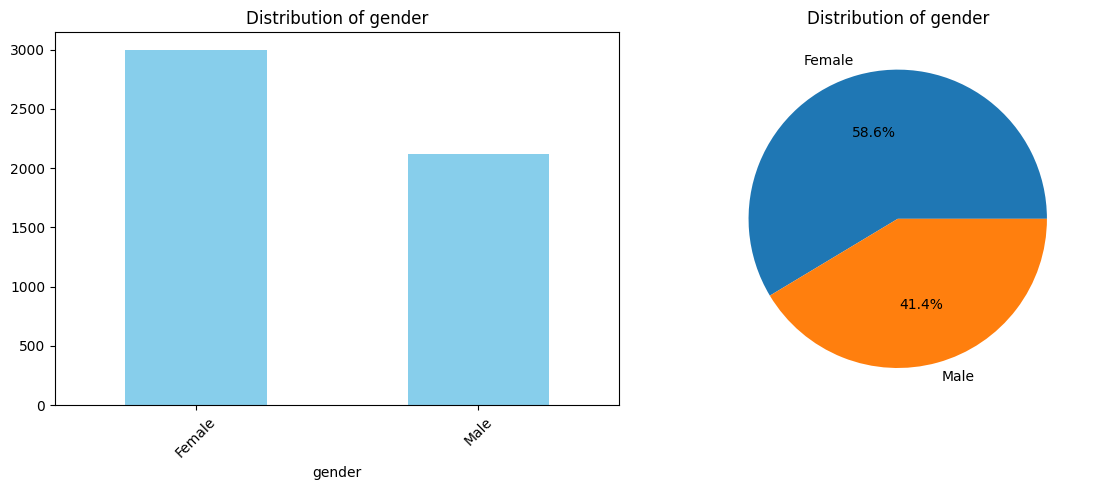


ever_married value counts:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64


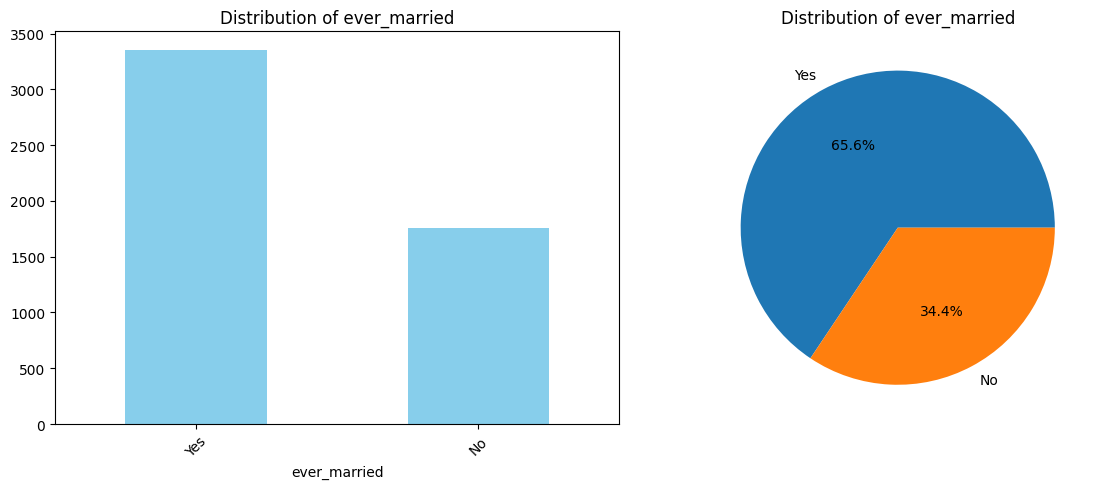


work_type value counts:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


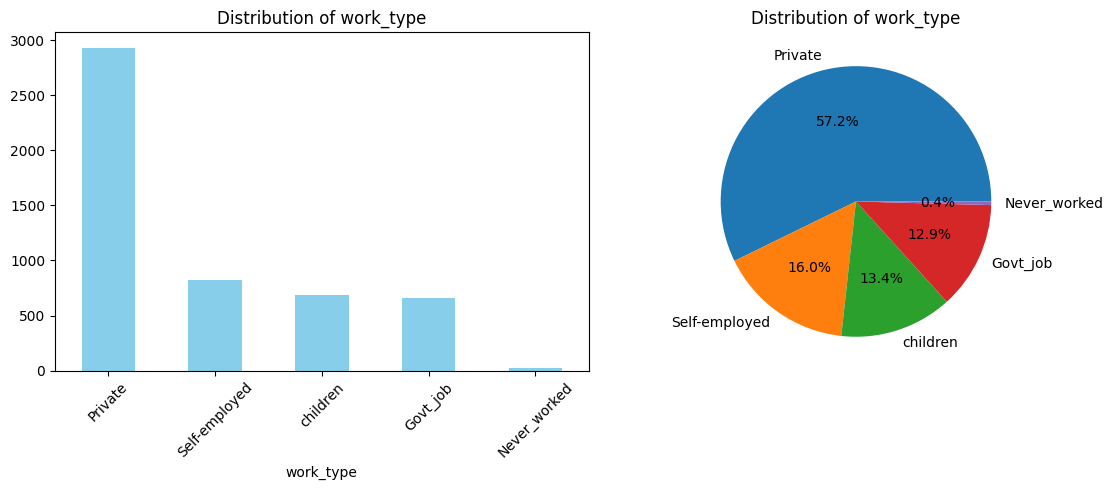


Residence_type value counts:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


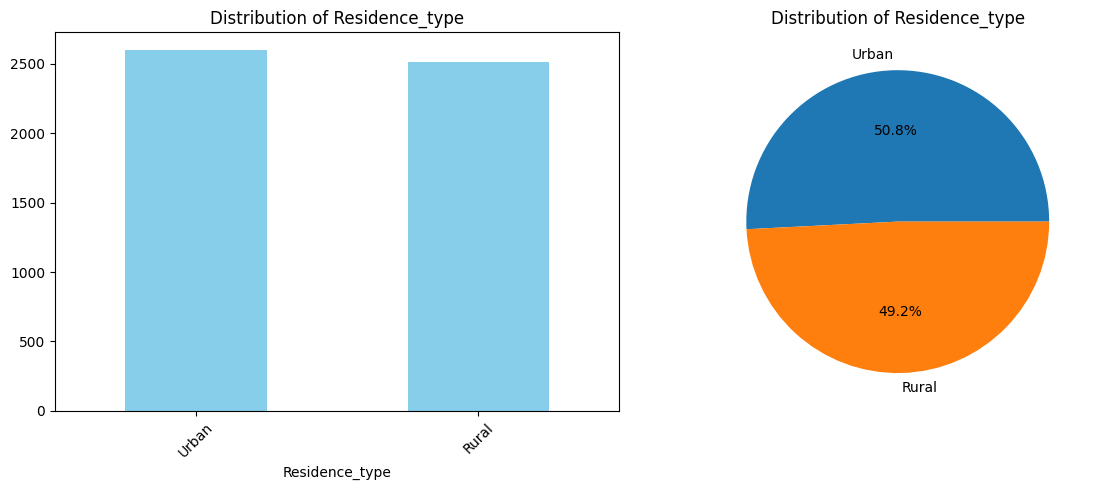


smoking_status value counts:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


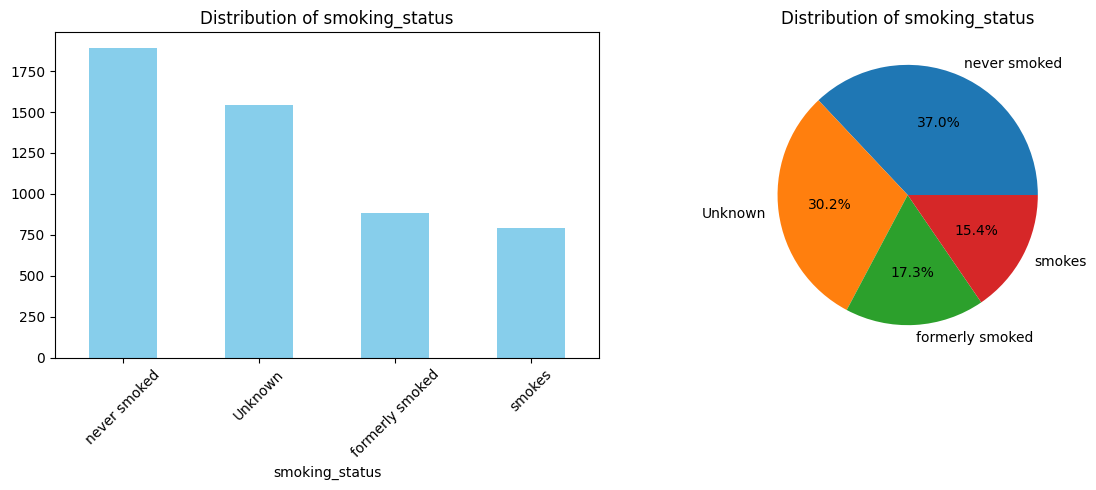

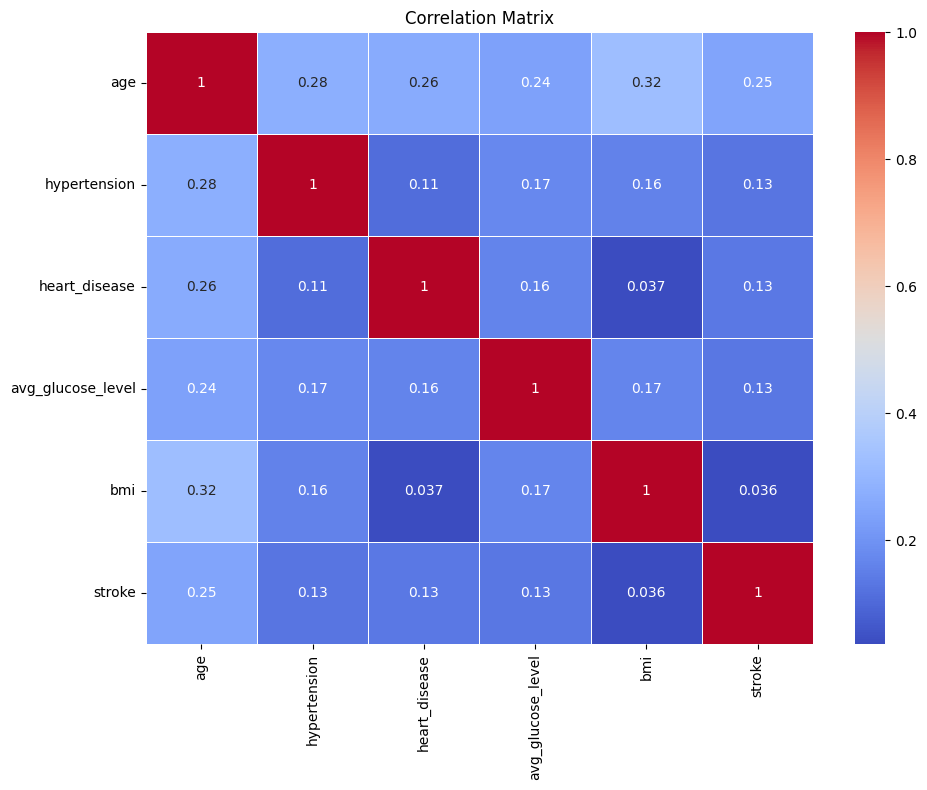

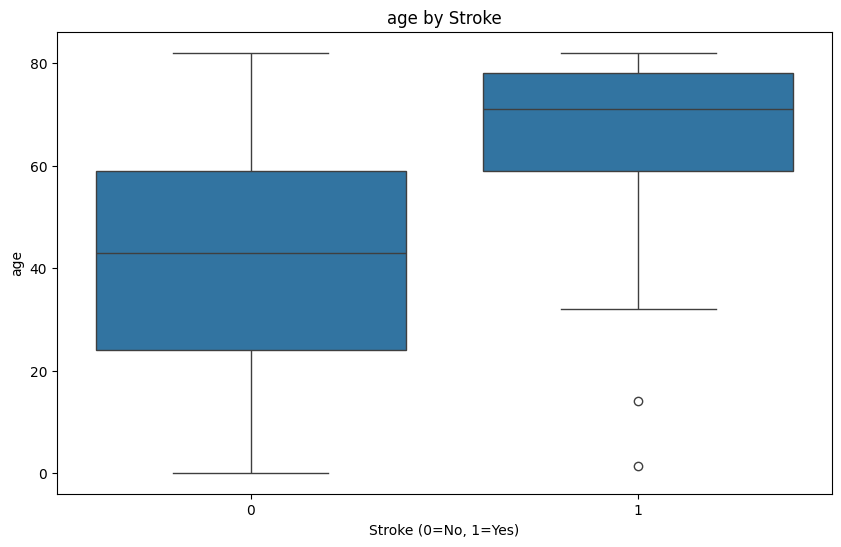

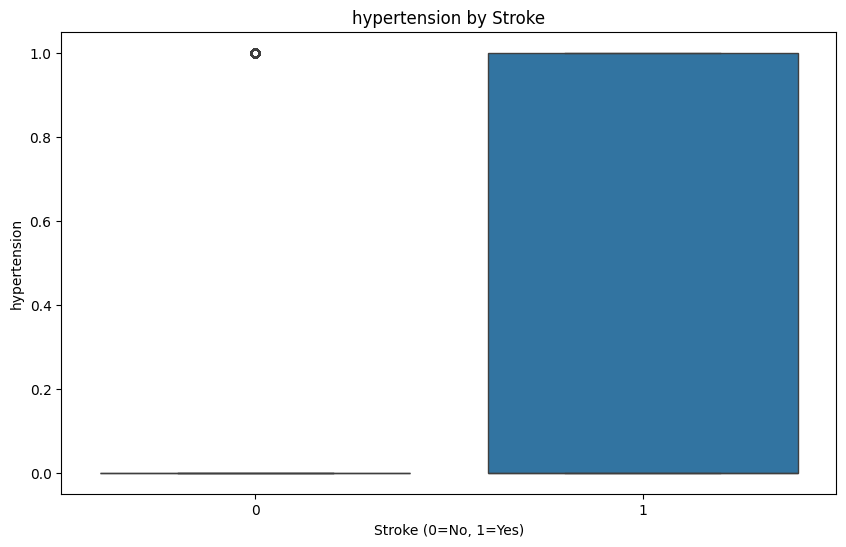

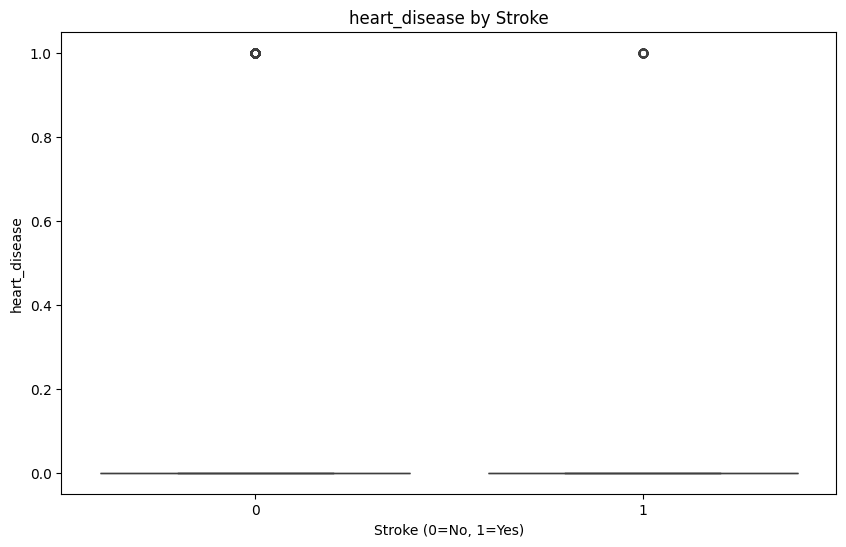

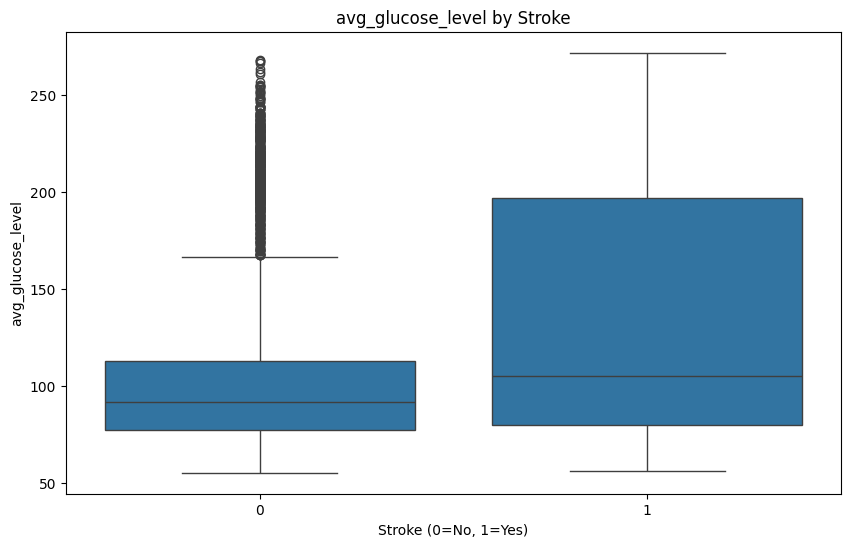

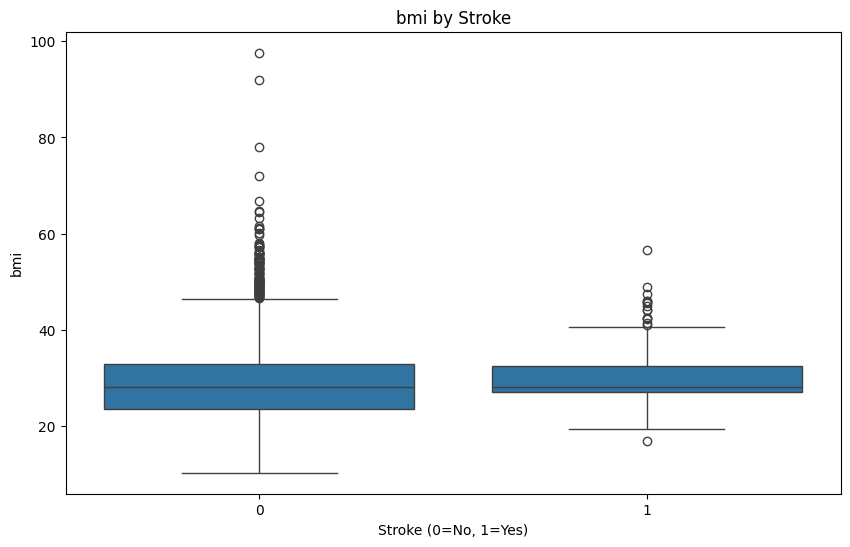

<Figure size 1200x600 with 0 Axes>

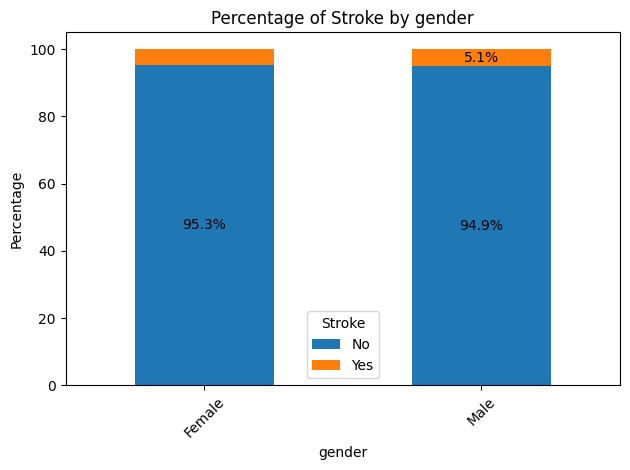

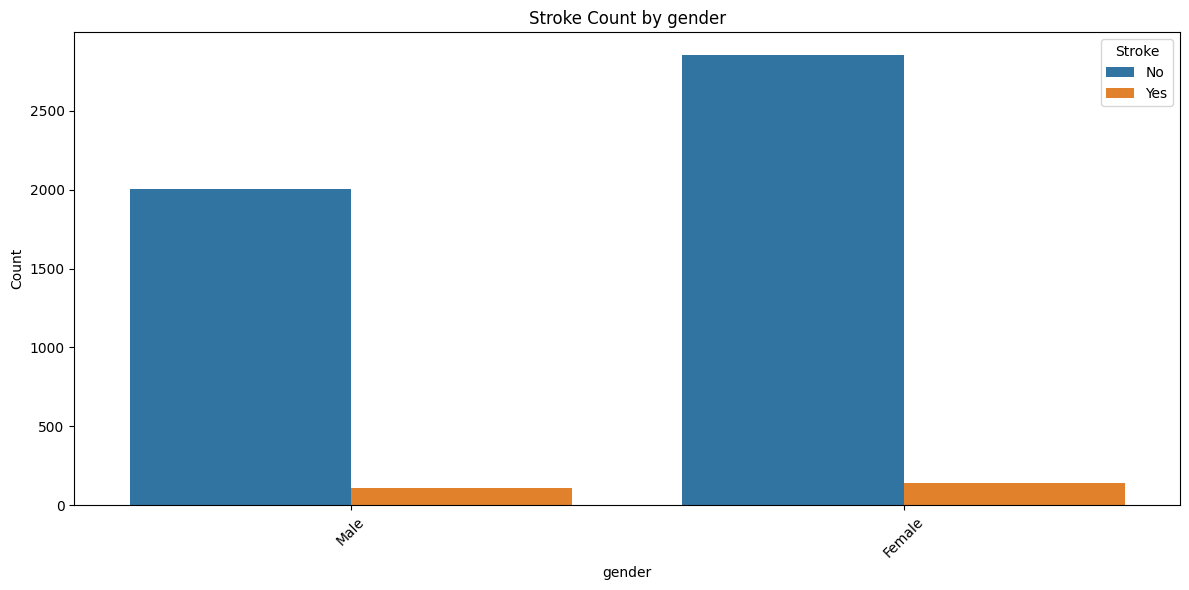

<Figure size 1200x600 with 0 Axes>

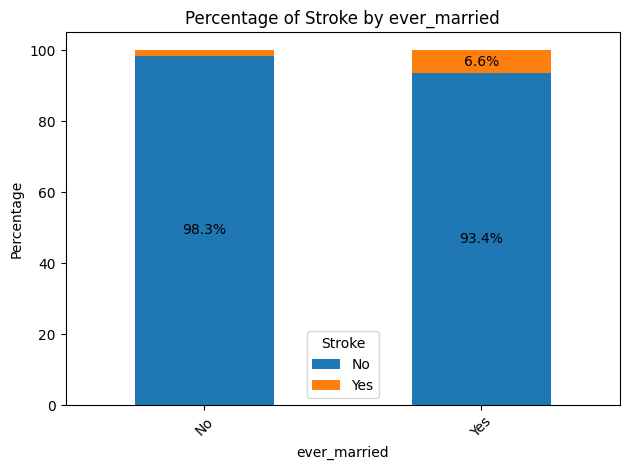

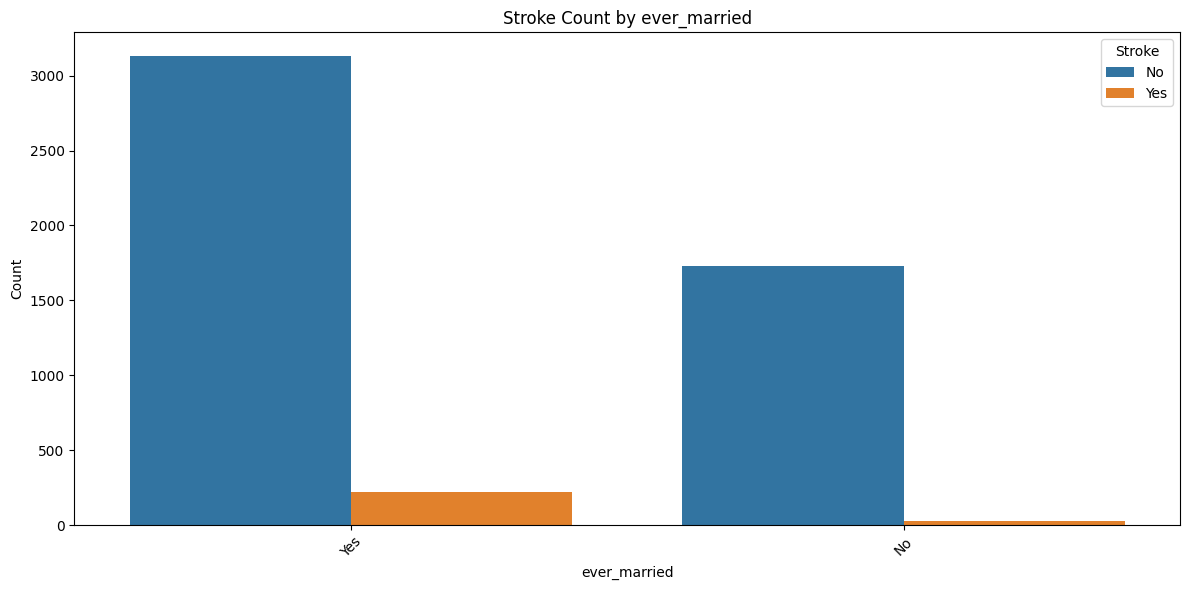

<Figure size 1200x600 with 0 Axes>

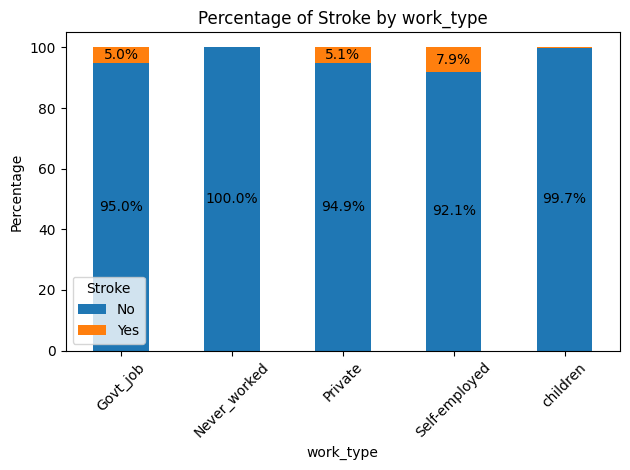

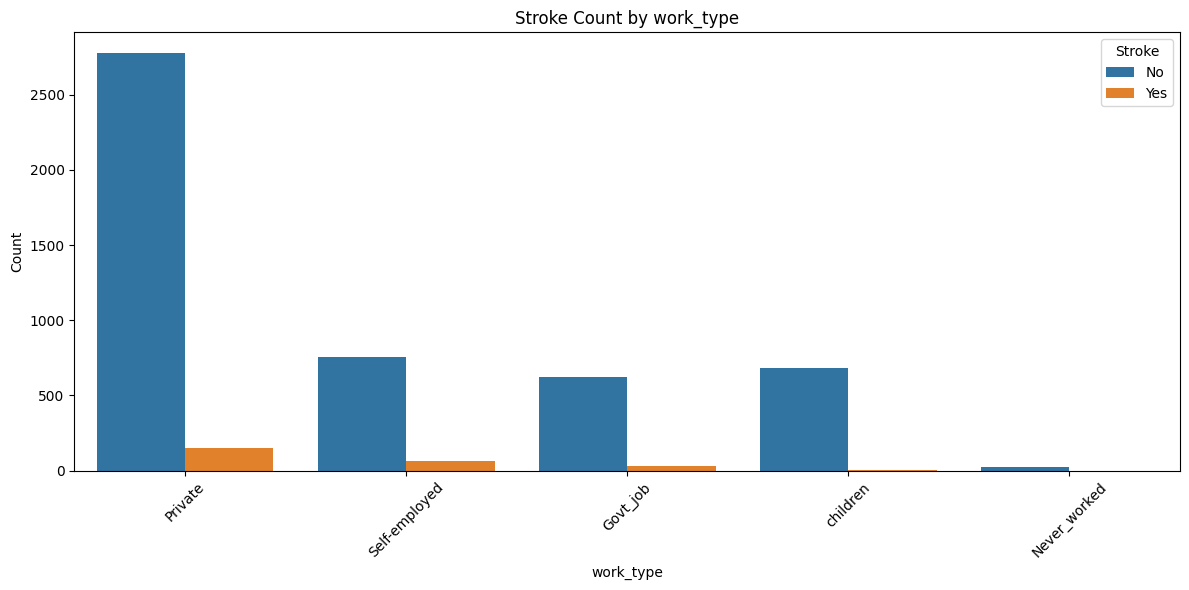

<Figure size 1200x600 with 0 Axes>

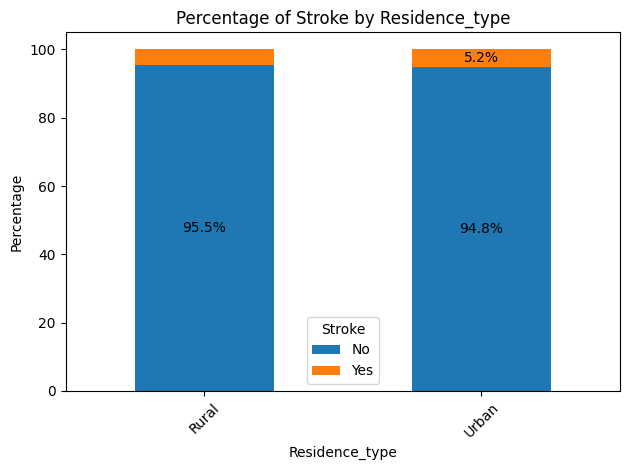

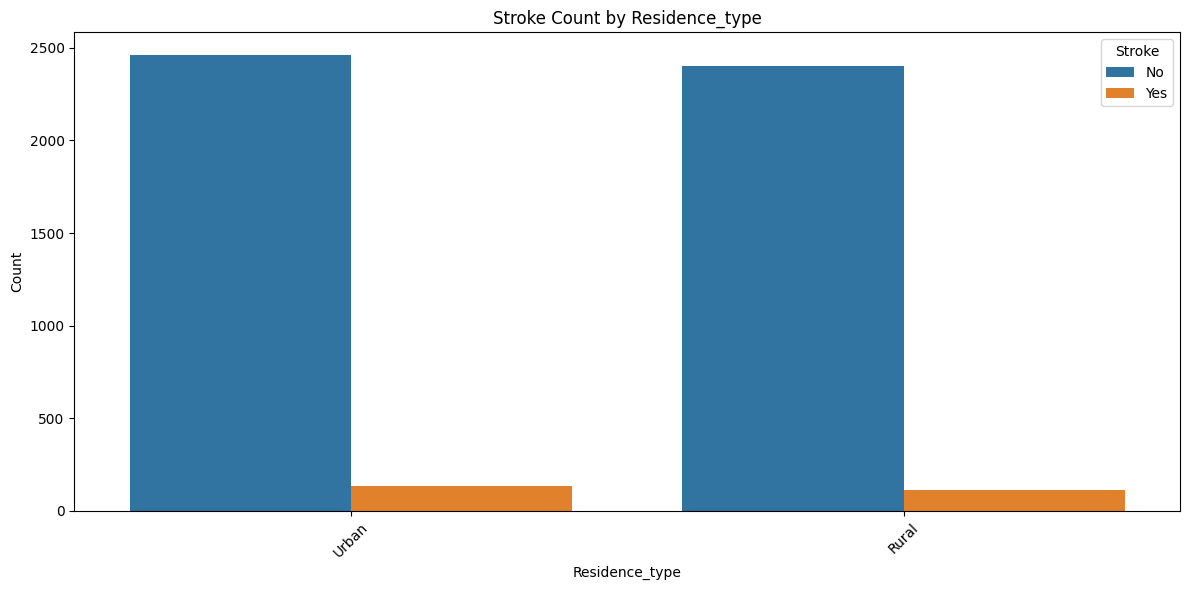

<Figure size 1200x600 with 0 Axes>

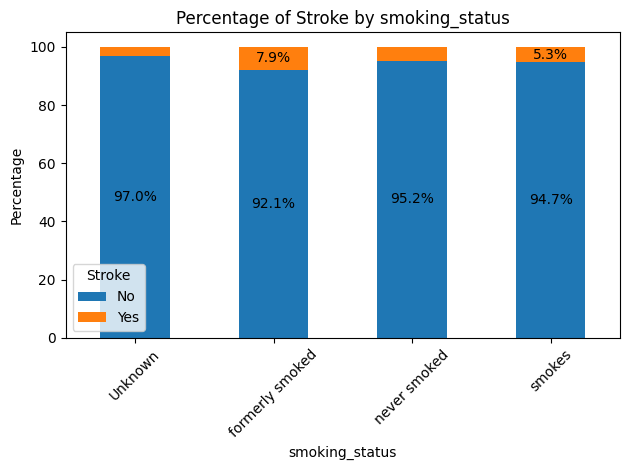

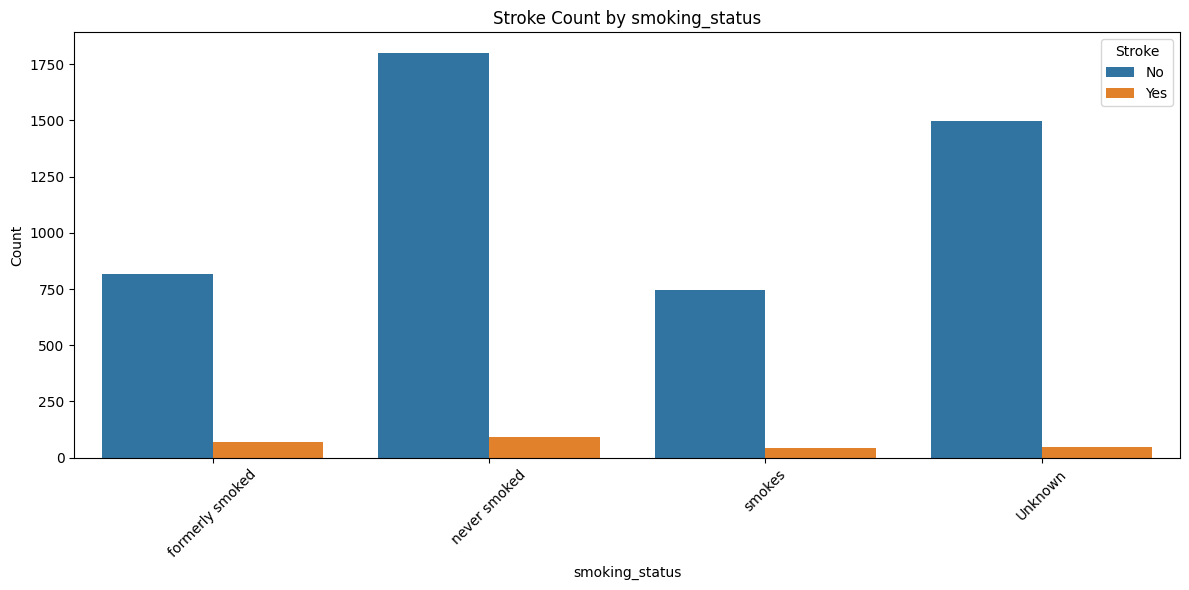


Exploratory Data Analysis completed.


In [1]:
# Stroke Exploratory Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

def load_data(file_path="healthcare-dataset-stroke-data.csv"):
    """Load the stroke dataset"""
    df = pd.read_csv(file_path)
    return df

def analyze_basic_info(df):
    """Display basic information about the dataset"""
    print(f"Dataset shape: {df.shape}")
    print("\nFirst few rows:")
    print(df.head())
    
    print("\nData types and non-null counts:")
    print(df.info())
    
    print("\nBasic statistics:")
    print(df.describe())
    
    print("\nMissing values:")
    print(df.isna().sum())

def analyze_target_distribution(df):
    """Analyze the distribution of the stroke target variable"""
    stroke_count = df['stroke'].value_counts()
    print("\nStroke distribution:")
    print(stroke_count)
    
    stroke_percentage = 100 * df['stroke'].value_counts(normalize=True)
    print(f"\n% of people who actually got a stroke: {stroke_percentage[1]:.3f}%")
    
    plt.figure(figsize=(8, 6))
    sns.countplot(x='stroke', data=df, palette='viridis')
    plt.title('Stroke Distribution')
    plt.xlabel('Stroke (0=No, 1=Yes)')
    plt.ylabel('Count')
    plt.show()

def analyze_missing_values(df):
    """Analyze missing values in the dataset"""
    missing = df.isna().sum()
    
    if missing.sum() > 0:
        print("\nMissing values per column:")
        print(missing[missing > 0])
        
        plt.figure(figsize=(10, 6))
        missing.plot.barh()
        plt.title('Missing Values')
        plt.xlabel('Count')
        plt.ylabel('Column')
        plt.tight_layout()
        plt.show()
        
        # Specific analysis for BMI missing values
        if 'bmi' in df.columns and df['bmi'].isna().sum() > 0:
            df_na = df.loc[df['bmi'].isnull()]
            stroke_in_na = df_na['stroke'].sum()
            print(f"People who got stroke and their BMI is NA: {stroke_in_na}")
            print(f"Overall people who got stroke: {df['stroke'].sum()}")
            print(f"Percentage of people with stroke in NaN values: {100 * stroke_in_na / df['stroke'].sum():.2f}%")
            
            missing_percentage = 100 * df['bmi'].isna().sum() / len(df)
            print(f"NULL values hold {missing_percentage:.2f}% of the instances in the dataframe")

def analyze_numerical_features(df):
    """Analyze numerical features"""
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    for col in numerical_cols:
        if col != 'id':  # Skip id column
            plt.figure(figsize=(12, 5))
            
            # Histogram
            plt.subplot(1, 2, 1)
            sns.histplot(df[col], kde=True)
            plt.title(f'Distribution of {col}')
            
            # Boxplot
            plt.subplot(1, 2, 2)
            sns.boxplot(data=df[col])
            plt.title(f'Boxplot of {col}')
            
            plt.tight_layout()
            plt.show()
            
            # If there are outliers, detect and count them
            if col in ['bmi', 'avg_glucose_level', 'age']:
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))
                outlier_count = outliers.sum()
                print(f"Total outliers in {col}: {outlier_count}")
                print(f"Total non-outliers in {col}: {len(df) - outlier_count}")

def analyze_categorical_features(df):
    """Analyze categorical features"""
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    for col in categorical_cols:
        value_counts = df[col].value_counts()
        print(f"\n{col} value counts:")
        print(value_counts)
        
        plt.figure(figsize=(12, 5))
        
        # Bar chart
        plt.subplot(1, 2, 1)
        value_counts.plot(kind='bar', color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        
        # Pie chart
        plt.subplot(1, 2, 2)
        value_counts.plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Distribution of {col}')
        plt.ylabel('')
        
        plt.tight_layout()
        plt.show()

def analyze_correlation(df):
    """Analyze correlation between numerical features"""
    numerical_df = df.select_dtypes(include=['float64', 'int64'])
    
    # Drop id column if it exists
    if 'id' in numerical_df.columns:
        numerical_df = numerical_df.drop('id', axis=1)
    
    # Calculate correlation matrix
    corr_matrix = numerical_df.corr()
    
    # Plot correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

def analyze_feature_relationships_with_target(df):
    """Analyze relationships between features and the stroke target"""
    # Numerical features vs target
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    numerical_cols = [col for col in numerical_cols if col not in ['id', 'stroke']]
    
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='stroke', y=col, data=df)
        plt.title(f'{col} by Stroke')
        plt.xlabel('Stroke (0=No, 1=Yes)')
        plt.ylabel(col)
        plt.show()
    
    # Categorical features vs target
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    for col in categorical_cols:
        plt.figure(figsize=(12, 6))
        
        # Cross-tabulation
        cross_tab = pd.crosstab(df[col], df['stroke'], normalize='index')
        cross_tab = cross_tab * 100  # Convert to percentage
        
        # Bar plot
        cross_tab.plot(kind='bar', stacked=True)
        plt.title(f'Percentage of Stroke by {col}')
        plt.xlabel(col)
        plt.ylabel('Percentage')
        plt.legend(title='Stroke', labels=['No', 'Yes'])
        plt.xticks(rotation=45)
        
        # Add text annotations
        for i, p in enumerate(plt.gca().patches):
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            if height > 5:  # Only annotate if percentage is greater than 5%
                plt.gca().text(x+width/2, y+height/2, f'{height:.1f}%', 
                               ha='center', va='center')
        
        plt.tight_layout()
        plt.show()
        
        # Count plot
        plt.figure(figsize=(12, 6))
        sns.countplot(x=col, hue='stroke', data=df)
        plt.title(f'Stroke Count by {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.legend(title='Stroke', labels=['No', 'Yes'])
        plt.tight_layout()
        plt.show()

def preprocess_data(df):
    """Basic preprocessing of the dataset"""
    # Make a copy to avoid modifying the original dataframe
    data = df.copy()
    
    # Drop ID column
    if 'id' in data.columns:
        data = data.drop('id', axis=1)
    
    # Handle missing BMI values
    if 'bmi' in data.columns and data['bmi'].isnull().sum() > 0:
        data['bmi'] = data['bmi'].fillna(data['bmi'].median())
    
    # Handle 'Other' gender
    if 'gender' in data.columns:
        data['gender'] = data['gender'].replace('Other', 'Female')
    
    return data

def main():
    # Load the dataset
    df = load_data()
    
    # Basic information
    analyze_basic_info(df)
    
    # Target distribution
    analyze_target_distribution(df)
    
    # Missing values
    analyze_missing_values(df)
    
    # Preprocess data
    df_processed = preprocess_data(df)
    
    # Analyze numerical features
    analyze_numerical_features(df_processed)
    
    # Analyze categorical features
    analyze_categorical_features(df_processed)
    
    # Correlation analysis
    analyze_correlation(df_processed)
    
    # Feature relationships with target
    analyze_feature_relationships_with_target(df_processed)
    
    print("\nExploratory Data Analysis completed.")

if __name__ == "__main__":
    main()